# Proyek Analisis Data: [Air Quality Dataset]   
- **Nama:** Popo Zakaria
- **Email:** pozaka16@gmail.com
- **ID Dicoding:** pozaka

## Menentukan Pertanyaan Bisnis

1. Daerah mana yang memiliki kualitas udara terendah dan terbaik dari rentang tahun 2013 sampai 2017?
2. Bagaimana Pengaruh SO2, NO2, CO dan O3 terhadap kualitas udara?
3. Bagaimana pengaruh TEMP,PRES,DEWP,RAIN, dan WSPM terhadap kualitas udara?
4. Bagaimana kualitas udara berdasarkan tahun, bulan, hari, & jam?

## Import Semua Packages/Library yang Digunakan

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### 1. Menyiapkan Dataset

In [115]:
df1 = pd.read_csv('./dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df2 = pd.read_csv('./dataset/PRSA_Data_Changping_20130301-20170228.csv')
df3 = pd.read_csv('./dataset/PRSA_Data_Dingling_20130301-20170228.csv')
df4 = pd.read_csv('./dataset/PRSA_Data_Dongsi_20130301-20170228.csv')
df5 = pd.read_csv('./dataset/PRSA_Data_Guanyuan_20130301-20170228.csv')
df6 = pd.read_csv('./dataset/PRSA_Data_Gucheng_20130301-20170228.csv')
df7 = pd.read_csv('./dataset/PRSA_Data_Huairou_20130301-20170228.csv')
df8 = pd.read_csv('./dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df9 = pd.read_csv('./dataset/PRSA_Data_Shunyi_20130301-20170228.csv')
df10 = pd.read_csv('./dataset/PRSA_Data_Tiantan_20130301-20170228.csv')
df11 = pd.read_csv('./dataset/PRSA_Data_Wanliu_20130301-20170228.csv')
df12 = pd.read_csv('./dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [116]:
# Menggabungkan semua data menjadi satu dataframe
df_aqi = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0)
df_aqi = df_aqi.reset_index() #menambahkan column index baru
df_aqi 

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


#### 2. Menghapus column yang Tidak Diperlukan

In [117]:
# Menghapus column yang tidak diperlukan
df_aqi = df_aqi.drop(['No'], axis=1)
df_aqi.head(10)

,index,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,5,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,6,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,7,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,8,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,9,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


#### 3. Menambahkan column Baru "Date" dan "Time"

In [118]:
from datetime import datetime

df_aqi['datetime'] = df_aqi.apply(lambda row: datetime(row['year'], row['month'], row['day'], row['hour']),  axis=1) 

#mendindahkan column datetime ke paling kiri
df_datetime = df_aqi['datetime']
df_aqi.drop('datetime', axis=1, inplace=True)
df_aqi.insert(0, 'datetime', df_datetime)

df_aqi.head(10) #menampilkan 5 baris pertama

,datetime,index,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,2013-03-01 05:00:00,5,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,2013-03-01 06:00:00,6,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,2013-03-01 07:00:00,7,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,2013-03-01 08:00:00,8,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,2013-03-01 09:00:00,9,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


#### 4. Mengubah data column (hour, day, dan month) menjadi tipe data kategori

In [119]:
# merubah nama column
df_aqi['month'] = df_aqi['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [120]:
# merubah data column hour
def hour_to_string(hour):
   return f'{hour:02}:00'

list_hour = [hour_to_string(hour) for hour in df_aqi['hour']]
df_aqi['hour'] = list_hour

In [121]:
# mengganti data column day
import calendar

def day_to_string(number):
    day_number = int(number - 1) % 7 # 1 Jan 2013 adalah hari Selasa
    return calendar.day_name[day_number]

df_aqi['day'] = df_aqi['day'].apply(day_to_string)

In [122]:
# menambah nama setiap column dengan prefix 'column_'
df_aqi = df_aqi.add_prefix('column_')

In [123]:
# mengganti nama column 'aqi_datetime' menjadi 'datetime'
df_aqi.rename(columns={'aqi_datetime': 'datetime'}, inplace=True)

In [124]:
# merubah column "yaer", "month", "day", "hour" menjadi category
column = ["column_year", "column_month", "column_day", "column_hour"]
df_aqi[column] = df_aqi[column].astype('category')


### Assesing data


#### 1. memeriksa tipe data dan melihat apakah ada missing value

In [125]:
print('type(df_aqi):', type(df_aqi))
df_aqi.info()

type(df_aqi): <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   column_datetime  420768 non-null  datetime64[ns]
 1   column_index     420768 non-null  int64         
 2   column_year      420768 non-null  category      
 3   column_month     420768 non-null  category      
 4   column_day       420768 non-null  category      
 5   column_hour      420768 non-null  category      
 6   column_PM2.5     412029 non-null  float64       
 7   column_PM10      414319 non-null  float64       
 8   column_SO2       411747 non-null  float64       
 9   column_NO2       408652 non-null  float64       
 10  column_CO        400067 non-null  float64       
 11  column_O3        407491 non-null  float64       
 12  column_TEMP      420370 non-null  float64       
 13  column_PRES      42037

In [126]:
# memeriksa missing value
print('| jumlah missing value: |')
print(df_aqi.isnull().sum())

| jumlah missing value: |
column_datetime        0
column_index           0
column_year            0
column_month           0
column_day             0
column_hour            0
column_PM2.5        8739
column_PM10         6449
column_SO2          9021
column_NO2         12116
column_CO          20701
column_O3          13277
column_TEMP          398
column_PRES          393
column_DEWP          403
column_RAIN          390
column_wd           1822
column_WSPM          318
column_station         0
dtype: int64


#### 2. memeriksa data yang duplikat dan memeriksa parameter statistik

In [127]:
print(f'jumlah data duplicate: {df_aqi.duplicated().sum()}')

jumlah data duplicate: 0


In [128]:
df_aqi.describe()

,column_datetime,column_index,column_PM2.5,column_PM10,column_SO2,column_NO2,column_CO,column_O3,column_TEMP,column_PRES,column_DEWP,column_RAIN,column_WSPM
count,420768,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2015-03-01 11:30:00.000001024,17531.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
min,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014-03-01 05:45:00,8765.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015-03-01 11:30:00,17531.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016-02-29 17:15:00,26297.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017-02-28 23:00:00,35063.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000
std,NaN,10122.116943,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386


Pada tahap ini kita berhasil mengidentifikasi berbagai masalah pada data yang telah kita kumpulkan

jumblah data duplikasi : 0

data missing value : terdapat di column [column_datetime,column_PM2.5, column_PM10, column_SO2, column_NO2, column_CO, column_O3, column_TEMP, column_PRES, column_DEWP, column_RAIN, column_wd, column_WSPM]

### Cleaning Data

#### 1. Menangani Missing Value

In [129]:
df_aqi.isna().sum()

column_datetime        0
column_index           0
column_year            0
column_month           0
column_day             0
column_hour            0
column_PM2.5        8739
column_PM10         6449
column_SO2          9021
column_NO2         12116
column_CO          20701
column_O3          13277
column_TEMP          398
column_PRES          393
column_DEWP          403
column_RAIN          390
column_wd           1822
column_WSPM          318
column_station         0
dtype: int64

Dari output code diatas, missing value setiap column berbeda-beda. Maka cara penangananya juga berbeda. Untuk missing value di bawah 5000 akan kita hapus, missing value antara 5000-15000 akan kita ganti nilainya dengan nilai mean/mode, dan untuk missing value di atas 15000 akan kita ganti dengan median agar tidak terganggu dengan outliernya

In [130]:
# missing value di bawah 5000, maka kita bisa menghapusnya
df_aqi.dropna(subset=['column_TEMP', 'column_PRES', 'column_DEWP', 'column_RAIN', 'column_wd', 'column_WSPM'], axis=0, inplace=True)

In [131]:
# missing value antara 5000 - 15000, maka kita bisa mengisi dengan nilai rata-rata
name_column = ['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_O3']

for column in name_column:
    mean = df_aqi[column].mean()
    df_aqi[column].fillna(mean, axis=0, inplace=True)

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\770402058.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_aqi[column].fillna(mean, axis=0, inplace=True)


In [132]:
# missing value di atas 15000, maka kita bisa menghapusnya
median_value = df_aqi['column_CO'].median()
df_aqi['column_CO'].fillna(median_value, axis=0, inplace=True)

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\875407201.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_aqi['column_CO'].fillna(median_value, axis=0, inplace=True)


In [133]:
# memeriksa missing value
print('| jumlah missing value: |')
print(df_aqi.isnull().sum())

| jumlah missing value: |
column_datetime    0
column_index       0
column_year        0
column_month       0
column_day         0
column_hour        0
column_PM2.5       0
column_PM10        0
column_SO2         0
column_NO2         0
column_CO          0
column_O3          0
column_TEMP        0
column_PRES        0
column_DEWP        0
column_RAIN        0
column_wd          0
column_WSPM        0
column_station     0
dtype: int64


Output sudah bersih dari missing value
langkah selanjutnya adalah EDA

## EDA (Exploratory Data Analysis)

In [134]:
# menampilkan parameter statistik dari data yang sudah di bersihkan dari missing value 
df_aqi.describe(include='all')

,column_datetime,column_index,column_year,column_month,column_day,column_hour,column_PM2.5,column_PM10,column_SO2,column_NO2,column_CO,column_O3,column_TEMP,column_PRES,column_DEWP,column_RAIN,column_wd,column_WSPM,column_station
count,418858,418858.000000,418858.0,418858,418858,418858,418858.000000,418858.000000,418858.00000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858,418858.000000,418858
unique,NaN,NaN,5.0,12,7,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,2014.0,Mar,Monday,16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dongsi
freq,NaN,NaN,105105.0,35692,67975,17519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43322,NaN,34980
mean,2015-02-27 12:05:34.638468864,17484.092955,NaN,NaN,NaN,NaN,79.707228,104.540046,15.84451,50.594782,1212.680302,57.507136,13.562796,1010.732098,2.493081,0.064609,NaN,1.734993,NaN
min,2013-03-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.28560,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN
25%,2014-02-27 17:00:00,8729.000000,NaN,NaN,NaN,NaN,21.000000,36.000000,3.00000,24.000000,500.000000,12.000000,3.200000,1002.200000,-8.900000,0.000000,NaN,0.900000,NaN
50%,2015-02-27 01:00:00,17473.000000,NaN,NaN,NaN,NaN,57.000000,84.000000,8.00000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,2016-02-27 03:00:00,26235.000000,NaN,NaN,NaN,NaN,109.000000,144.000000,19.00000,70.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN
max,2017-02-28 23:00:00,35063.000000,NaN,NaN,NaN,NaN,999.000000,999.000000,500.00000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN


##### mengclustering kualitas udara berdasarkan dengan beberapa faktor (pm2.5, pm10, so2, no2, co, o3) dan faktor lainnya (temp, pres, dewp, rain, wd, wspm)

In [135]:
# batasan standar deviasi setiap faktor untuk menentukan kualitas udara
def det_quality_air(PM25, PM10, SO2, NO2, CO, O3):
    standar = {
        'PM25': [(0, 12), (12, 35), (35, float('inf'))],
        'PM10': [(0, 50), (50, 100), (100, float('inf'))],
        'SO2': [(0, 20), (20, 100), (100, float('inf'))],
        'NO2': [(0, 40), (40, 100), (100, float('inf'))],
        'CO': [(0, 1000), (1000, 5000), (5000, float('inf'))],
        'O3': [(0, 100), (100, 180), (180, float('inf'))]
    }

# fungsi untuk menentukan kualitas udara
    def det_quality(parameter, value):
        for  quality, law in enumerate(standar[parameter], start=1):
            if isinstance(law, tuple):
                if law[0] <= value < law[1]:
                    return quality
                else:
                    if value == law[1]:
                        return quality
                return 3

    PM25_quality = det_quality('PM25', float(PM25))
    PM10_quality = det_quality('PM10', float(PM10))
    SO2_quality = det_quality('SO2', float(SO2))
    NO2_quality = det_quality('NO2', float(NO2))
    CO_quality = det_quality('CO', float(CO))
    O3_quality = det_quality('O3', float(O3))

    

# menghitung rata - rata kualitas udara
    average_quality = (PM25_quality + PM10_quality + SO2_quality + NO2_quality + CO_quality + O3_quality) / 6

    if average_quality < 2:
        return 'Bersih'
    elif average_quality < 2.5:
        return 'Sedang'
    else:
        return 'Buruk'

df_aqi['quality_air'] = df_aqi.apply(lambda row: det_quality_air(row['column_PM2.5'], row['column_PM10'], row['column_SO2'], row['column_NO2'], row['column_CO'], row['column_O3']), axis=1)

df_aqi['quality_air'] = df_aqi['quality_air'].astype('category')

kita cek apakah code di atas berjalan dengan baik apa tidak, dengan menjalankan code di bawah untuk menampilkan 20 data sample

In [136]:
df_aqi.sample(20)

,column_datetime,column_index,column_year,column_month,column_day,column_hour,column_PM2.5,column_PM10,column_SO2,column_NO2,column_CO,column_O3,column_TEMP,column_PRES,column_DEWP,column_RAIN,column_wd,column_WSPM,column_station,quality_air
78391,2014-02-08 07:00:00,8263,2014,Feb,Monday,07:00,129.0,90.0,10.0,45.0,1700.0,5.000000,-7.8,1017.00,-9.4,0.0,NW,1.6,Dingling,Sedang
70558,2013-03-18 22:00:00,430,2013,Mar,Thursday,22:00,44.0,93.0,10.0,33.0,700.0,53.000000,3.4,1001.10,-4.6,0.0,ESE,3.6,Dingling,Bersih
420030,2017-01-29 06:00:00,34326,2017,Jan,Monday,06:00,13.0,80.0,2.0,5.0,200.0,67.000000,0.3,1021.75,-20.4,0.0,NE,7.2,Wanshouxigong,Bersih
379829,2016-06-29 05:00:00,29189,2016,Jun,Monday,05:00,115.0,115.0,2.0,42.0,800.0,8.000000,19.8,998.60,19.1,0.0,ENE,0.5,Wanliu,Sedang
401279,2014-12-09 23:00:00,15575,2014,Dec,Tuesday,23:00,326.0,421.0,84.0,154.0,7000.0,10.000000,0.3,1025.00,-8.2,0.0,NW,1.4,Wanshouxigong,Buruk
391889,2013-11-13 17:00:00,6185,2013,Nov,Saturday,17:00,237.0,273.0,110.0,114.0,2900.0,57.507136,5.8,1011.90,1.7,0.0,WNW,0.4,Wanshouxigong,Buruk
142907,2013-06-19 11:00:00,2651,2013,Jun,Friday,11:00,30.0,52.0,17.0,40.0,200.0,109.000000,33.7,997.80,14.7,0.0,ENE,1.5,Guanyuan,Sedang
230052,2015-05-29 12:00:00,19668,2015,May,Monday,12:00,78.0,78.0,11.0,28.0,800.0,128.000000,28.9,996.20,13.9,0.0,S,3.2,Huairou,Sedang
135812,2016-08-27 20:00:00,30620,2016,Aug,Saturday,20:00,51.0,67.0,2.0,73.0,800.0,35.000000,22.5,1007.40,15.1,0.0,W,0.6,Dongsi,Sedang
152920,2014-08-10 16:00:00,12664,2014,Aug,Wednesday,16:00,107.0,107.0,2.0,21.0,600.0,189.000000,32.4,994.30,20.0,0.0,SW,2.9,Guanyuan,Sedang


output sudah sesuai dengan apa yang kita inginkan di kolom quality_air, mari kita lihat jumblah data di kolom quality_air

In [137]:
df_aqi['quality_air'].value_counts()

quality_air
Sedang    175561
Bersih    164376
Buruk      78921
Name: count, dtype: int64

membuat kolom yang berisi nilai dari kualitas udara, jika buruk=-1, sedang=0, dan baik=1. kolom ini bertujuan untuk memdudahkan kita dalam visualisasi data

In [138]:
# membuat kolom jika udara bersih 1 sedang 0 dan buruk -1 untuk memudahkan visualisasi
df_aqi['index_aqi'] = df_aqi['quality_air']
df_aqi['index_aqi'] = df_aqi['index_aqi'].map({'Bersih': 1, 'Sedang': 0, 'Buruk': -1})
df_aqi['index_aqi'] = df_aqi['index_aqi'].astype('int')

In [139]:
# menampilkan jumlah data dan tipe data
df_aqi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418858 entries, 0 to 420767
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   column_datetime  418858 non-null  datetime64[ns]
 1   column_index     418858 non-null  int64         
 2   column_year      418858 non-null  category      
 3   column_month     418858 non-null  category      
 4   column_day       418858 non-null  category      
 5   column_hour      418858 non-null  category      
 6   column_PM2.5     418858 non-null  float64       
 7   column_PM10      418858 non-null  float64       
 8   column_SO2       418858 non-null  float64       
 9   column_NO2       418858 non-null  float64       
 10  column_CO        418858 non-null  float64       
 11  column_O3        418858 non-null  float64       
 12  column_TEMP      418858 non-null  float64       
 13  column_PRES      418858 non-null  float64       
 14  column_DEWP      418858 n

##### Cek data parameter statistik

In [140]:
# cek data parameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan kualitas udara
df_aqi.groupby(by ='quality_air')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'], 
                                                                                                                               'column_PM10': ['max', 'min', 'mean'],
                                                                                                                               'column_SO2': ['max', 'min', 'mean'],
                                                                                                                               'column_NO2': ['max', 'min', 'mean'],
                                                                                                                               'column_CO': ['max', 'min', 'mean'],
                                                                                                                               'column_O3': ['max', 'min', 'mean']})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\486837101.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='quality_air')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'],


column_PM2.5                  column_PM10                   \
                     max  min        mean         max  min        mean   
quality_air                                                              
Bersih             500.0  2.0   24.216790       999.0  2.0   40.339784   
Buruk              999.0  3.0  157.869622       999.0  5.0  190.250060   
Sedang             804.0  3.0   96.525553       987.0  2.0  126.120365   

            column_SO2                    column_NO2                     \
                   max     min       mean        max     min       mean   
quality_air                                                               
Bersih           500.0  0.2856   5.674283      231.0  1.0265  25.367375   
Buruk            500.0  1.0000  47.079046      277.0  2.0000  85.509142   
Sedang           500.0  0.2856  11.325742      290.0  2.0000  58.519686   

            column_CO                     column_O3                     
                  max    min         mean       max     min       mean  
quality_air                                                             
Bersih        10000.0  100.0   515.465883    1050.0  0.2142  60.477098  
Buruk         10000.0  100.0  2461.735609    1071.0  0.2142  44.132865  
Sedang        10000.0  100.0  1303.979756    1071.0  0.2142  60.738608

Keterangan:

Berdasarkan hasil tersebut di dapatkan informasi bahwa, baris baik pada kolom kualitas_udara memiliki nilai mean yang relatif lebih rendah jika di bandingkan baris lain. Jika di kelompokkan berdasarkan nilai mean dari yang terkecil

* baik
* sedang
* buruk

In [141]:
# cek data parameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan tempat station
df_aqi.groupby(by ='column_station')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'], 
                                                                                                                               'column_PM10': ['max', 'min', 'mean'],
                                                                                                                               'column_SO2': ['max', 'min', 'mean'],
                                                                                                                               'column_NO2': ['max', 'min', 'mean'],
                                                                                                                               'column_CO': ['max', 'min', 'mean'],
                                                                                                                               'column_O3': ['max', 'min', 'mean']})

column_PM2.5                 column_PM10                   \
                        max  min       mean         max  min        mean   
column_station                                                             
Aotizhongxin          898.0  3.0  82.675086       984.0  2.0  109.946421   
Changping             882.0  2.0  71.179889       999.0  2.0   94.720732   
Dingling              881.0  3.0  66.188317       905.0  2.0   84.055196   
Dongsi                737.0  3.0  86.017997       955.0  2.0  110.196997   
Guanyuan              680.0  2.0  82.854068       999.0  2.0  108.935650   
Gucheng               770.0  2.0  83.686124       994.0  2.0  118.646175   
Huairou               762.0  2.0  69.762001       993.0  2.0   91.722954   
Nongzhanguan          844.0  2.0  84.720816       995.0  2.0  108.911015   
Shunyi                941.0  2.0  78.980924       999.0  2.0   98.302053   
Tiantan               821.0  3.0  82.103133       988.0  2.0  106.333994   
Wanliu                957.0  2.0  83.330616       951.0  2.0  110.424038   
Wanshouxigong         999.0  3.0  84.887476       961.0  2.0  112.113412   

               column_SO2                    column_NO2                     \
                      max     min       mean        max     min       mean   
column_station                                                               
Aotizhongxin        341.0  0.2856  17.345220      290.0  2.0000  59.010902   
Changping           310.0  0.2856  14.982183      226.0  1.8477  44.267785   
Dingling            156.0  0.2856  11.830243      205.0  1.0265  28.366600   
Dongsi              300.0  0.2856  18.487665      258.0  2.0000  53.508997   
Guanyuan            293.0  1.0000  17.566285      270.0  2.0000  57.725304   
Gucheng             500.0  0.2856  15.372565      276.0  2.0000  55.723211   
Huairou             315.0  0.2856  12.268448      231.0  1.0265  33.349722   
Nongzhanguan        257.0  0.5712  18.659744      273.0  2.0000  57.923299   
Shunyi              239.0  0.2856  13.636948      258.0  2.0000  43.773834   
Tiantan             273.0  0.5712  14.430910      241.0  2.0000  53.096813   
Wanliu              282.0  0.2856  18.364478      264.0  1.6424  64.786588   
Wanshouxigong       411.0  0.2856  17.133690      251.0  2.0000  55.390408   

               column_CO                      column_O3                     
                     max    min         mean        max     min       mean  
column_station                                                              
Aotizhongxin     10000.0  100.0  1243.760700   423.0000  0.2142  56.459472  
Changping        10000.0  100.0  1138.952367   429.0000  0.2142  58.055606  
Dingling         10000.0  100.0   902.512674   500.0000  0.2142  68.282120  
Dongsi           10000.0  100.0  1289.980360  1071.0000  0.6426  57.295073  
Guanyuan         10000.0  100.0  1252.153901   415.0000  0.2142  55.895995  
Gucheng          10000.0  100.0  1305.603502   450.0000  0.2142  57.816993  
Huairou          10000.0  100.0  1015.422110   444.0000  0.2142  60.018291  
Nongzhanguan     10000.0  100.0  1308.966524   390.0000  0.2142  58.591829  
Shunyi           10000.0  100.0  1159.490021   351.7164  0.2142  55.748211  
Tiantan          10000.0  100.0  1284.823270   674.0000  0.4284  56.095801  
Wanliu           10000.0  100.0  1295.930814   364.0000  0.2142  49.493694  
Wanshouxigong     9800.0  100.0  1352.272192   358.0000  0.2142  56.340105


keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* Daerah Dingling, Huairou, dan Changping memeiliki nilai mean terendah
* Daerah Nongzhanguan, Gucheng, Wanliu dan dongsi memiliki nilai mean tertinggi

In [142]:
# cek data parameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan tahun
df_aqi.groupby(by ='column_year')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'], 
                                                                                                                               'column_PM10': ['max', 'min', 'mean'],
                                                                                                                               'column_SO2': ['max', 'min', 'mean'],
                                                                                                                               'column_NO2': ['max', 'min', 'mean'],
                                                                                                                               'column_CO': ['max', 'min', 'mean'],
                                                                                                                               'column_O3': ['max', 'min', 'mean']})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\4046145153.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_year')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'],


column_PM2.5                 column_PM10                   \
                     max  min       mean         max  min        mean   
column_year                                                             
2013               844.0  2.0  80.010274       999.0  2.0  102.823659   
2014               809.0  3.0  85.419711       999.0  3.0  115.870830   
2015               762.0  3.0  79.540518       999.0  3.0  103.556222   
2016               999.0  3.0  71.916931       995.0  3.0   94.605875   
2017               835.0  2.0  92.153426       994.0  3.0  110.752470   

            column_SO2                    column_NO2                     \
                   max     min       mean        max     min       mean   
column_year                                                               
2013             234.0  0.2856  19.973224      273.0  1.0265  52.480708   
2014             500.0  1.0000  20.704752      285.0  2.0000  54.576215   
2015             314.0  2.0000  13.068938      290.0  2.0000  48.211039   
2016             500.0  2.0000   9.924926      253.0  2.0000  46.388064   
2017             300.0  1.0000  17.960995      276.0  2.0000  56.938423   

            column_CO                     column_O3                     
                  max    min         mean       max     min       mean  
column_year                                                             
2013          10000.0  100.0  1158.579994    1071.0  0.2142  57.348644  
2014          10000.0  100.0  1245.365111     413.0  1.0000  58.274299  
2015          10000.0  100.0  1250.818480     450.0  2.0000  59.369281  
2016          10000.0  100.0  1130.672554     500.0  1.0000  57.696044  
2017          10000.0  100.0  1571.651015     500.0  1.0000  40.477576

Keterangan:

* PM2.5 (Partikel Matter 2.5 Mikrometer): rata-rata paling sedikit pada tahun 2016 dan paling banyak 2017

* PM10 (Partikel Matter 10 Mikrometer): rata-rata paling sedikit pada tahun 2016 dan paling banyak 2014

* SO2 (Dioksida Belerang): rata-rata paling sedikit pada tahun 2016 dan paling banyak 2014

* NO2 (Dioksida Nitrogen): rata-rata paling sediki pada tahun 2016 dan paling banyak 2014

* CO (Karbon Monoksida): rata-rata paling sedikit pada tahun 2016 dan paling banyak 2017

* O3 (Ozon): rata-rata paling sedikit pada tahun 2017 dan paling banyak 2015

In [143]:
# cek data parameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan bulan
df_aqi.groupby(by ='column_month')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'], 
                                                                                                                               'column_PM10': ['max', 'min', 'mean'],
                                                                                                                               'column_SO2': ['max', 'min', 'mean'],
                                                                                                                               'column_NO2': ['max', 'min', 'mean'],
                                                                                                                               'column_CO': ['max', 'min', 'mean'],
                                                                                                                               'column_O3': ['max', 'min', 'mean']})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\1741512930.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_month')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'],


column_PM2.5                  column_PM10                   \
                      max  min        mean         max  min        mean   
column_month                                                              
Apr                 533.0  2.0   72.889229       999.0  2.0  116.719498   
Aug                 500.0  3.0   53.854657       748.0  2.0   71.834993   
Dec                 741.0  3.0  103.656280       948.0  2.0  124.731482   
Feb                 999.0  3.0   87.302109       992.0  3.0  102.547699   
Jan                 835.0  2.0   93.440503       999.0  3.0  113.125964   
Jul                 540.0  3.0   71.989508       862.0  2.0   84.987446   
Jun                 560.0  2.0   69.346075       647.0  2.0   86.989335   
Mar                 558.0  3.0   94.473345       987.0  2.0  135.699181   
May                 844.0  3.0   63.583799       995.0  2.0  107.021183   
Nov                 687.0  3.0   92.996062       993.0  3.0  117.804457   
Oct                 527.0  3.0   91.386328       999.0  2.0  112.339021   
Sep                 477.0  3.0   61.766353       584.0  2.0   79.974660   

             column_SO2                    column_NO2                     \
                    max     min       mean        max     min       mean   
column_month                                                               
Apr               158.0  0.2856  14.266580      231.0  1.6424  47.394787   
Aug               218.0  0.2856   4.863961      188.0  2.0000  36.393633   
Dec               219.0  1.0000  25.497412      265.0  1.6424  66.078639   
Feb               500.0  1.0000  27.990301      264.0  2.0000  50.220793   
Jan               500.0  1.0000  31.430561      276.0  2.0000  61.480173   
Jul               240.0  0.2856   5.821134      177.0  1.0265  36.193508   
Jun               227.0  0.2856   8.101264      228.0  2.0000  39.602553   
Mar               310.0  1.4280  27.846565      273.0  2.0000  59.937678   
May               500.0  2.0000  14.159332      242.0  2.0000  42.850657   
Nov               234.0  0.5712  15.366448      232.0  1.0265  61.688627   
Oct               273.0  0.2856   8.860974      290.0  1.2318  59.484168   
Sep               147.0  1.0000   6.547113      206.0  2.0000  45.727506   

             column_CO                      column_O3                     
                   max    min         mean        max     min       mean  
column_month                                                              
Apr             5800.0  100.0   842.060591   674.0000  0.2142  69.961069  
Aug             6700.0  100.0   828.539364  1071.0000  0.2142  87.550215  
Dec            10000.0  100.0  2033.299607   500.0000  0.2142  22.995457  
Feb             9800.0  100.0  1367.853380   216.0000  1.0000  41.375686  
Jan            10000.0  100.0  1836.221768   500.0000  1.0000  28.358267  
Jul             4200.0  100.0   892.506915   500.0000  0.2142  93.969396  
Jun            10000.0  100.0   982.625062   432.0000  0.2142  93.667641  
Mar            10000.0  100.0  1298.317382   450.0000  0.2142  51.188024  
May             6100.0  100.0   801.262751   500.0000  0.2142  91.065441  
Nov             9900.0  100.0  1621.831888   444.0000  0.2142  21.735169  
Oct             9100.0  100.0  1131.400135   295.3818  0.2142  31.022956  
Sep             5700.0  100.0   923.573890   283.0000  0.6426  55.286346


Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

*Bulan Agustus, Juli, & Juni memeiliki nilai mean terendah
* Bulan januari, Desember, & Maret memiliki nilai mean tertinggi

In [144]:
# cek data parameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan hari
df_aqi.groupby(by ='column_day')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'], 
                                                                                                                               'column_PM10': ['max', 'min', 'mean'],
                                                                                                                               'column_SO2': ['max', 'min', 'mean'],
                                                                                                                               'column_NO2': ['max', 'min', 'mean'],
                                                                                                                               'column_CO': ['max', 'min', 'mean'],
                                                                                                                               'column_O3': ['max', 'min', 'mean']})


C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\1246978198.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_day')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'],


column_PM2.5                 column_PM10                   \
                    max  min       mean         max  min        mean   
column_day                                                             
Friday            844.0  3.0  75.608879       991.0  2.0  100.043696   
Monday            999.0  3.0  83.874959       999.0  2.0  111.123577   
Saturday          646.0  2.0  75.518608       995.0  2.0   97.836651   
Sunday            835.0  2.0  82.905926       994.0  2.0  106.499951   
Thursday          705.0  2.0  80.715441       857.0  2.0  103.564897   
Tuesday           687.0  2.0  79.394372       999.0  2.0  104.805842   
Wednesday         640.0  2.0  79.116679       948.0  2.0  106.074842   

           column_SO2                    column_NO2                     \
                  max     min       mean        max     min       mean   
column_day                                                               
Friday          314.0  0.2856  14.440273      259.0  1.0265  48.637313   
Monday          500.0  0.2856  16.944435      243.0  1.2318  51.900701   
Saturday        310.0  0.2856  14.966539      238.0  1.6424  49.374170   
Sunday          500.0  0.2856  16.117869      273.0  1.6424  51.227210   
Thursday        293.0  0.2856  15.190191      285.0  1.4371  50.946250   
Tuesday         263.0  0.2856  16.493905      290.0  2.0000  50.751244   
Wednesday       315.0  0.2856  16.285832      264.0  1.0265  50.935870   

           column_CO                     column_O3                     
                 max    min         mean       max     min       mean  
column_day                                                             
Friday       10000.0  100.0  1153.558908     423.0  0.2142  58.784069  
Monday       10000.0  100.0  1250.158779    1071.0  0.2142  56.004115  
Saturday     10000.0  100.0  1175.960410     500.0  0.2142  58.410607  
Sunday       10000.0  100.0  1240.094344     409.0  0.2142  57.591532  
Thursday     10000.0  100.0  1241.660619     403.0  0.2142  57.146245  
Tuesday      10000.0  100.0  1201.599563    1071.0  0.2142  58.044973  
Wednesday    10000.0  100.0  1218.688393    1071.0  0.2142  56.887135

Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* Hari Selasa, Senin & Rabu memeiliki nilai mean terendah
* hari Minggu, Kamis & Sabtu memiliki nilai mean tertinggi

In [145]:
# cek data parameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan jam
df_aqi.groupby(by ='column_hour')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'], 
                                                                                                                               'column_PM10': ['max', 'min', 'mean'],
                                                                                                                               'column_SO2': ['max', 'min', 'mean'],
                                                                                                                               'column_NO2': ['max', 'min', 'mean'],
                                                                                                                               'column_CO': ['max', 'min', 'mean'],
                                                                                                                               'column_O3': ['max', 'min', 'mean']})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\3464290719.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_hour')[['column_PM2.5', 'column_PM10', 'column_SO2', 'column_NO2', 'column_CO', 'column_O3']].agg({'column_PM2.5': ['max', 'min', 'mean'],


column_PM2.5                 column_PM10                   \
                     max  min       mean         max  min        mean   
column_hour                                                             
00:00              809.0  3.0  87.392862       986.0  2.0  114.691758   
01:00              881.0  3.0  86.462239       991.0  2.0  111.045779   
02:00              999.0  3.0  84.398700       995.0  2.0  106.521868   
03:00              857.0  3.0  81.845857       992.0  2.0  102.117386   
04:00              801.0  2.0  79.285087       973.0  2.0   97.798374   
05:00              770.0  2.0  76.364755       893.0  2.0   93.788172   
06:00              720.0  3.0  74.324116       839.0  2.0   92.328267   
07:00              712.0  3.0  73.381870       828.0  2.0   93.888028   
08:00              610.0  3.0  74.590217       785.0  2.0   98.575608   
09:00              640.0  3.0  76.084853       895.0  2.0  100.886673   
10:00              661.0  2.0  77.204315       947.0  2.0  100.963425   
11:00              705.0  2.0  77.433147       999.0  2.0   99.662602   
12:00              844.0  3.0  76.948037       987.0  2.0   97.013014   
13:00              741.0  3.0  76.343285       961.0  2.0   95.285096   
14:00              718.0  2.0  75.525783       957.0  2.0   95.228160   
15:00              708.0  2.0  74.693486       999.0  2.0   96.834642   
16:00              687.0  3.0  74.218508       704.0  2.0   99.103340   
17:00              689.0  2.0  75.448031       887.0  2.0  103.478770   
18:00              684.0  2.0  77.848226       984.0  2.0  110.078893   
19:00              670.0  3.0  82.029975       849.0  3.0  116.536406   
20:00              685.0  3.0  86.112762       999.0  2.0  121.599755   
21:00              685.0  2.0  88.344658       891.0  2.0  122.880098   
22:00              770.0  3.0  88.503344       914.0  2.0  120.549356   
23:00              737.0  2.0  88.375421       993.0  2.0  118.342808   

            column_SO2                    column_NO2                     \
                   max     min       mean        max     min       mean   
column_hour                                                               
00:00            226.0  0.2856  15.053013      253.0  1.2318  57.764141   
01:00            500.0  0.2856  15.092115      257.0  1.0265  55.605598   
02:00            341.0  0.2856  14.715023      235.0  1.0265  53.202294   
03:00            263.0  0.2856  13.696079      221.0  1.0265  52.241700   
04:00            500.0  0.2856  13.218770      207.0  2.0000  51.639765   
05:00            310.0  0.2856  12.797457      207.0  1.6424  50.936351   
06:00            195.0  0.2856  12.775759      196.0  2.0000  50.755342   
07:00            206.0  0.2856  13.234204      192.0  2.0000  52.560854   
08:00            254.0  0.2856  14.819125      212.0  2.0000  54.181122   
09:00            235.0  0.2856  17.325736      223.0  2.0000  52.606594   
10:00            225.0  0.5712  19.098705      240.0  2.0000  49.998392   
11:00            315.0  0.2856  19.592028      247.0  1.6424  46.880018   
12:00            224.0  0.2856  19.344221      273.0  2.0000  43.899932   
13:00            273.0  0.2856  18.853526      259.0  2.0000  40.892849   
14:00            272.0  0.2856  17.921985      276.0  1.8477  39.002399   
15:00            268.0  0.2856  17.456597      258.0  2.0000  38.866093   
16:00            500.0  0.2856  16.793147      257.0  2.0000  39.700133   
17:00            219.0  0.2856  16.185170      263.0  2.0000  42.942978   
18:00            192.0  0.2856  15.443075      271.0  2.0000  48.504246   
19:00            207.0  0.2856  15.267364      270.0  2.0000  54.327127   
20:00            195.0  0.2856  15.367897      290.0  1.4371  58.167777   
21:00            300.0  0.2856  15.353790      285.0  2.0000  60.069874   
22:00            257.0  0.2856  15.385956      280.0  2.0000  60.351904   
23:00            234.0  0.2856  15.383994      269.0  2.0000  59.459537   

            co

Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* Jam 06:00, 05:00 & 04:00 memeiliki nilai mean terendah
* Jam 21:00, 20:00 & 22:00 memiliki nilai mean tertinggi

#### 2. mengecek kualitas udara berdasarkan tempat, tahun, bulan, hari, dan jam

In [146]:
# cek kualitas berdasarkan tempat station
df_aqi.groupby(by ='column_station').agg({'quality_air': 'value_counts'})

quality_air
column_station quality_air             
Aotizhongxin   Sedang             15544
               Bersih             12192
               Buruk               7241
Changping      Bersih             15815
               Sedang             13367
               Buruk               5731
Dingling       Bersih             20189
               Sedang             10914
               Buruk               3810
Dongsi         Sedang             14318
               Bersih             12517
               Buruk               8145
Guanyuan       Sedang             15305
               Bersih             12075
               Buruk               7597
Gucheng        Sedang             16511
               Bersih             11214
               Buruk               7173
Huairou        Bersih             17677
               Sedang             12881
               Buruk               4196
Nongzhanguan   Sedang             14555
               Bersih             12166
               Buruk               8259
Shunyi         Bersih             15043
               Sedang             13824
               Buruk               5705
Tiantan        Sedang             16788
               Bersih             12413
               Buruk               5779
Wanliu         Sedang             16246
               Bersih             11099
               Buruk               7590
Wanshouxigong  Sedang             15308
               Bersih             11976
               Buruk               7695


Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* kualitas udara baik paling banyak berada di daerah Dingling, dan paling sedikit berada di daerah Gucheng
* Kualitas udara sedang paling banyak berada di daerah Gucheng, dan paling sedikit berada di daerah Dingling
* Kualitas udara buruk paling banyak berada di daerah Nongzhanguan, dan paling sedikit berada di daerah Dingling

In [147]:
# cek kualitas berdasarkan tahun
df_aqi.groupby(by ='column_year').agg({'quality_air': 'value_counts'})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\491862420.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_year').agg({'quality_air': 'value_counts'})


quality_air
column_year quality_air             
2013        Sedang             39244
            Bersih             31272
            Buruk              17578
2014        Sedang             45475
            Bersih             34384
            Buruk              25246
2015        Bersih             43857
            Sedang             42277
            Buruk              18389
2016        Bersih             47196
            Sedang             43673
            Buruk              13762
2017        Bersih              7667
            Sedang              4892
            Buruk               3946

In [148]:
# cek kualitas berdasarkan bulan
df_aqi.groupby(by ='column_month').agg({'quality_air': 'value_counts'})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\3294231266.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_month').agg({'quality_air': 'value_counts'})


quality_air
column_month quality_air             
Apr          Sedang             16638
             Bersih             12121
             Buruk               5751
Aug          Bersih             17456
             Sedang             17193
             Buruk                993
Dec          Bersih             12863
             Buruk              12018
             Sedang             10699
Feb          Bersih             15080
             Buruk              10337
             Sedang              6857
Jan          Buruk              14568
             Bersih             13102
             Sedang              7574
Jul          Sedang             19976
             Bersih             14323
             Buruk               1348
Jun          Sedang             17673
             Bersih             13884
             Buruk               2974
Mar          Buruk              13762
             Bersih             12581
             Sedang              9349
May          Sedang             17707
             Bersih             12490
             Buruk               5468
Nov          Sedang             15486
             Bersih             12016
             Buruk               6856
Oct          Sedang             19410
             Bersih             13267
             Buruk               2791
Sep          Sedang             16999
             Bersih             15193
             Buruk               2055


Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* Kualitas udara baik paling banyak di bulan Agustus, dan paling sedikit di bulan januari
* Kualitas udara sedang paling banyak di bulan Maret dan paling sedikit di bulan Agustus
* Kualitas udara buruk paling banyak di bulan Desember, dan paling sedikit di bulan Agustus

In [149]:
# cek kualitas berdasarkan hari
df_aqi.groupby(by ='column_day').agg({'quality_air': 'value_counts'})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\2033556261.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_day').agg({'quality_air': 'value_counts'})


quality_air
column_day quality_air             
Friday     Sedang             23529
           Bersih             22582
           Buruk               8966
Monday     Sedang             28070
           Bersih             25792
           Buruk              14113
Saturday   Sedang             23019
           Bersih             22048
           Buruk               9972
Sunday     Sedang             23808
           Bersih             20329
           Buruk              10885
Thursday   Sedang             23594
           Bersih             22112
           Buruk               9244
Tuesday    Sedang             27411
           Bersih             26880
           Buruk              13415
Wednesday  Sedang             26130
           Bersih             24633
           Buruk              12326


Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* Kualitas udara baik paling banyak di hari Kamis, dan paling sedikit di hari Minggu
* Kualitas udara sedang paling banyak di hari Senin dan paling sedikit di hari Jumat
* Kualitas udara buruk paling banyak di hari Senin, dan paling sedikit di hari Juma

In [150]:
# cek kualitas berdasarkan jam
df_aqi.groupby(by ='column_hour').agg({'quality_air': 'value_counts'})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\1868917653.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_hour').agg({'quality_air': 'value_counts'})


quality_air
column_hour quality_air             
00:00       Sedang              8027
            Bersih              6202
            Buruk               3207
01:00       Sedang              7783
            Bersih              6656
...                              ...
22:00       Bersih              5337
            Buruk               3608
23:00       Sedang              8218
            Bersih              5791
            Buruk               3405

[72 rows x 1 columns]

#### 3. TEMPERATURE, PRESSURE, DEW POINT dan WIND SPEED

In [151]:
# cek temp, pres, dewp, rain, wd, wspm berdasarkan kualitas udara
df_aqi.groupby(by ='quality_air').agg({'column_TEMP': ['max', 'min', 'mean'],
                                       'column_PRES': ['max', 'min', 'mean'],
                                       'column_DEWP': ['max', 'min', 'mean'],
                                       'column_RAIN': ['max', 'min', 'mean'],
                                       'column_WSPM': ['max', 'min', 'mean']})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\1944976399.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='quality_air').agg({'column_TEMP': ['max', 'min', 'mean'],


column_TEMP                  column_PRES                      \
                    max   min       mean         max    min         mean   
quality_air                                                                
Bersih             41.4 -19.9  13.467697      1042.8  982.4  1011.477361   
Buruk              39.2 -15.2   7.634480      1037.0  985.4  1014.242206   
Sedang             41.6 -15.7  16.316828      1038.5  982.4  1008.456395   

            column_DEWP                 column_RAIN                 \
                    max   min      mean         max  min      mean   
quality_air                                                          
Bersih             29.1 -36.0 -0.672397        52.1  0.0  0.085632   
Buruk              28.8 -28.2 -2.409981        72.5  0.0  0.012490   
Sedang             28.8 -33.4  7.660989        72.5  0.0  0.068354   

            column_WSPM                 
                    max  min      mean  
quality_air                             
Bersih             12.0  0.0  2.187422  
Buruk              13.2  0.0  1.385051  
Sedang             12.9  0.0  1.468700

Berdasarkan hasil di atas dapat disimpulkan, Kualitas udara akan semakin baik saat TEMP naik, PRES turun, DEWP naik, & WSPM naik. sedangkan sebaliknya kualitas udara akan semakin menurun saat TEMP turun, PRES naik, DEWP turun, & WSPM turun

In [152]:
# cek temp, pres, dewp, rain, wd, wspm berdasarkan tempat station
df_aqi.groupby(by ='column_station').agg({'column_TEMP': ['max', 'min', 'mean'],
                                          'column_PRES': ['max', 'min', 'mean'],
                                          'column_DEWP': ['max', 'min', 'mean'],
                                          'column_RAIN': ['max', 'min', 'mean'],
                                          'column_WSPM': ['max', 'min', 'mean']})

column_TEMP                  column_PRES                      \
                       max   min       mean         max    min         mean   
column_station                                                                
Aotizhongxin          40.5 -16.8  13.600094      1042.0  985.9  1011.835904   
Changping             41.4 -16.6  13.705645      1036.5  982.4  1007.745621   
Dingling              41.4 -16.6  13.705645      1036.5  982.4  1007.745621   
Dongsi                41.1 -16.8  13.687112      1042.0  987.1  1012.537433   
Guanyuan              40.5 -16.8  13.600094      1042.0  985.9  1011.835904   
Gucheng               41.6 -15.6  13.875923      1038.1  984.0  1008.830782   
Huairou               40.3 -19.9  12.477479      1036.5  982.8  1007.576458   
Nongzhanguan          41.1 -16.8  13.687112      1042.0  987.1  1012.537433   
Shunyi                40.6 -16.8  13.467495      1042.8  988.0  1013.012335   
Tiantan               41.1 -16.8  13.687112      1042.0  987.1  1012.537433   
Wanliu                40.5 -15.8  13.452327      1040.3  985.9  1011.081133   
Wanshouxigong         40.6 -16.8  13.800545      1042.0  985.1  1011.500086   

               column_DEWP                 column_RAIN                 \
                       max   min      mean         max  min      mean   
column_station                                                          
Aotizhongxin          28.5 -35.3  3.129628        72.5  0.0  0.067547   
Changping             27.2 -35.1  1.505307        52.1  0.0  0.060276   
Dingling              27.2 -35.1  1.505307        52.1  0.0  0.060276   
Dongsi                28.8 -35.3  2.453548        46.4  0.0  0.064137   
Guanyuan              28.5 -35.3  3.129628        72.5  0.0  0.067547   
Gucheng               27.4 -34.6  2.602476        41.9  0.0  0.064637   
Huairou               29.1 -34.9  2.220910        45.9  0.0  0.068004   
Nongzhanguan          28.8 -35.3  2.453548        46.4  0.0  0.064137   
Shunyi                27.5 -36.0  2.474254        37.3  0.0  0.061758   
Tiantan               28.8 -35.3  2.453548        46.4  0.0  0.064137   
Wanliu                28.5 -34.9  3.270803        72.5  0.0  0.068473   
Wanshouxigong         28.5 -35.3  2.713622        46.4  0.0  0.064356   

               column_WSPM                 
                       max  min      mean  
column_station                             
Aotizhongxin          11.2  0.0  1.710856  
Changping             10.0  0.0  1.858305  
Dingling              10.0  0.0  1.858305  
Dongsi                10.5  0.0  1.863310  
Guanyuan              11.2  0.0  1.710856  
Gucheng               12.0  0.0  1.347026  
Huairou               12.9  0.0  1.662813  
Nongzhanguan          10.5  0.0  1.863310  
Shunyi                12.8  0.0  1.829110  
Tiantan               10.5  0.0  1.863310  
Wanliu                11.2  0.0  1.504903  
Wanshouxigong         13.2  0.0  1.747703

In [153]:
# cek temp, pres, dewp, rain, wd, wspm berdasarkan tahun
df_aqi.groupby(by ='column_year').agg({'column_TEMP': ['max', 'min', 'mean'],
                                       'column_PRES': ['max', 'min', 'mean'],
                                       'column_DEWP': ['max', 'min', 'mean'],
                                       'column_RAIN': ['max', 'min', 'mean'],
                                       'column_WSPM': ['max', 'min', 'mean']})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\735001386.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_year').agg({'column_TEMP': ['max', 'min', 'mean'],


column_TEMP                    column_PRES                      \
                    max     min       mean         max    min         mean   
column_year                                                                  
2013               38.0 -11.600  15.692061      1033.8  982.9  1007.733006   
2014               41.6 -14.500  13.915448      1037.0  983.6  1010.642132   
2015               39.3 -13.800  13.447486      1039.4  982.4  1011.114525   
2016               38.2 -19.900  13.599983      1042.8  984.8  1011.215562   
2017               16.2 -13.425   0.446815      1037.6  997.1  1021.825704   

            column_DEWP                  column_RAIN                 \
                    max   min       mean         max  min      mean   
column_year                                                           
2013               29.1 -27.7   5.473755        72.5  0.0  0.066123   
2014               26.8 -33.4   2.741014        45.9  0.0  0.049766   
2015               26.2 -33.4   2.613189        52.1  0.0  0.076155   
2016               27.5 -36.0   2.137752        46.4  0.0  0.076445   
2017                0.9 -31.7 -13.502939         1.3  0.0  0.002896   

            column_WSPM                 
                    max  min      mean  
column_year                             
2013               13.2  0.0  1.599644  
2014               11.7  0.0  1.637919  
2015               11.2  0.0  1.779006  
2016                9.8  0.0  1.855936  
2017               12.0  0.0  2.030154

In [154]:
# cek temp, pres, dewp, rain, wd, wspm berdasarkan bulan
df_aqi.groupby(by ='column_month').agg({'column_TEMP': ['max', 'min', 'mean'],
                                        'column_PRES': ['max', 'min', 'mean'],
                                        'column_DEWP': ['max', 'min', 'mean'],
                                        'column_RAIN': ['max', 'min', 'mean'],
                                        'column_WSPM': ['max', 'min', 'mean']})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\2145637837.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_month').agg({'column_TEMP': ['max', 'min', 'mean'],


column_TEMP                  column_PRES                       \
                     max   min       mean         max     min         mean   
column_month                                                                 
Apr                 32.3  -1.6  15.331941      1031.2   985.4  1008.309280   
Aug                 37.7  12.9  26.648993      1015.2   985.2  1001.231104   
Dec                 15.4 -11.9  -0.228004      1037.1  1000.0  1021.518392   
Feb                 16.2 -14.5   1.132914      1038.0   997.1  1020.323274   
Jan                 14.0 -19.9  -1.785663      1042.8  1001.0  1022.099339   
Jul                 39.3  14.8  27.200710      1011.0   982.9   998.131689   
Jun                 38.2  12.2  24.558573      1011.8   985.4   999.333468   
Mar                 26.2  -8.9   8.350364      1035.5   988.5  1013.956613   
May                 41.6   4.3  21.491998      1019.7   982.4  1002.389460   
Nov                 21.5 -13.8   4.787243      1039.4   996.6  1018.779405   
Oct                 29.4  -2.6  13.471873      1037.2   996.0  1014.903109   
Sep                 34.5   6.1  20.788098      1027.8   984.8  1008.661655   

             column_DEWP                  column_RAIN                 \
                     max   min       mean         max  min      mean   
column_month                                                           
Apr                 17.0 -26.9   0.179093        13.0  0.0  0.022918   
Aug                 29.1  -5.1  18.930599        72.5  0.0  0.096504   
Dec                  2.4 -28.0 -11.926872         3.5  0.0  0.001107   
Feb                  5.1 -31.9 -13.020016         1.9  0.0  0.009816   
Jan                  0.9 -36.0 -14.782017         0.5  0.0  0.000358   
Jul                 27.7   1.9  19.918013        52.1  0.0  0.268070   
Jun                 26.1 -11.2  15.613388        45.9  0.0  0.133098   
Mar                 12.6 -33.4  -7.946548         5.7  0.0  0.007590   
May                 22.3 -17.7   6.875629        21.0  0.0  0.045905   
Nov                 10.3 -33.4  -4.635797         2.6  0.0  0.018563   
Oct                 18.6 -24.4   5.610488        11.7  0.0  0.041491   
Sep                 23.0  -4.6  13.969542        46.4  0.0  0.125360   

             column_WSPM                 
                     max  min      mean  
column_month                             
Apr                 11.8  0.0  2.176847  
Aug                  8.1  0.0  1.450965  
Dec                 10.9  0.0  1.820742  
Feb                 11.2  0.0  2.015666  
Jan                 12.0  0.0  1.885470  
Jul                  8.7  0.0  1.500079  
Jun                 10.1  0.0  1.578133  
Mar                 13.2  0.0  1.977219  
May                 11.0  0.0  2.068114  
Nov                 11.7  0.0  1.590995  
Oct                  9.7  0.0  1.414622  
Sep                  9.1  0.0  1.356469

In [155]:
# cek temp, pres, dewp, rain, wd, wspm berdasarkan hari
df_aqi.groupby(by ='column_day').agg({'column_TEMP': ['max', 'min', 'mean'],
                                      'column_PRES': ['max', 'min', 'mean'],
                                      'column_DEWP': ['max', 'min', 'mean'],
                                      'column_RAIN': ['max', 'min', 'mean'],
                                      'column_WSPM': ['max', 'min', 'mean']})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\4063883816.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_day').agg({'column_TEMP': ['max', 'min', 'mean'],


column_TEMP                       column_PRES                      \
                   max        min       mean         max    min         mean   
column_day                                                                     
Friday            39.0 -16.400000  13.714111      1038.0  982.4  1010.623347   
Monday            41.6 -15.900000  13.510918      1042.8  984.8  1010.808027   
Saturday          39.3 -13.000000  13.443880      1037.1  983.2  1011.177623   
Sunday            37.9 -12.366667  13.547536      1036.0  986.5  1011.017223   
Thursday          38.2 -14.600000  13.658819      1036.0  982.9  1010.381343   
Tuesday           37.7 -18.100000  13.585715      1042.3  985.0  1010.473912   
Wednesday         38.0 -19.900000  13.495414      1041.3  985.2  1010.690467   

           column_DEWP                 column_RAIN                column_WSPM  \
                   max   min      mean         max  min      mean         max   
column_day                                                                      
Friday            27.5 -27.9  2.496202        37.4  0.0  0.055653        11.4   
Monday            28.8 -32.3  2.499220        45.9  0.0  0.058863        12.0   
Saturday          28.8 -29.3  2.325738        36.1  0.0  0.101192        10.9   
Sunday            28.0 -30.1  2.674832        47.7  0.0  0.060114        11.2   
Thursday          28.7 -31.6  2.522189        72.5  0.0  0.077798        10.5   
Tuesday           29.1 -36.0  2.583846        39.0  0.0  0.048824        13.2   
Wednesday         28.3 -31.9  2.348459        40.7  0.0  0.056075        11.8   

                           
            min      mean  
column_day                 
Friday      0.0  1.799481  
Monday      0.0  1.741608  
Saturday    0.0  1.699090  
Sunday      0.0  1.686231  
Thursday    0.0  1.755960  
Tuesday     0.0  1.738506  
Wednesday   0.0  1.723383

In [156]:
# cek temp, pres, dewp, rain, wd, wspm berdasarkan jam
df_aqi.groupby(by ='column_hour').agg({'column_TEMP': ['max', 'min', 'mean'],
                                       'column_PRES': ['max', 'min', 'mean'],
                                       'column_DEWP': ['max', 'min', 'mean'],
                                       'column_RAIN': ['max', 'min', 'mean'],
                                       'column_WSPM': ['max', 'min', 'mean']})

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\3622812016.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aqi.groupby(by ='column_hour').agg({'column_TEMP': ['max', 'min', 'mean'],


column_TEMP                  column_PRES                      \
                    max   min       mean         max    min         mean   
column_hour                                                                
00:00              32.8 -18.9  11.302703      1041.5  985.3  1011.148192   
01:00              32.6 -19.7  10.857039      1040.9  985.3  1011.065542   
02:00              31.0 -19.5  10.373513      1040.4  985.2  1011.057582   
03:00              30.7 -19.9  10.001262      1040.1  985.0  1010.961113   
04:00              30.3 -18.5   9.684358      1039.6  984.8  1010.964318   
05:00              30.4 -18.7   9.437505      1039.4  985.1  1011.130776   
06:00              31.2 -16.9   9.630436      1040.1  985.6  1011.398372   
07:00              32.4 -17.3  10.548824      1041.0  985.9  1011.720841   
08:00              33.2 -17.9  11.919936      1041.7  985.3  1012.004587   
09:00              35.4 -16.8  13.491960      1042.3  985.0  1012.095588   
10:00              38.1 -16.2  14.887379      1042.0  985.0  1011.927344   
11:00              39.8 -15.8  16.004572      1042.3  984.8  1011.456917   
12:00              39.8 -15.4  16.956289      1041.2  984.5  1010.728708   
13:00              41.0 -15.0  17.699869      1040.4  984.0  1009.997174   
14:00              41.6 -14.7  18.162244      1040.0  983.3  1009.419507   
15:00              41.1 -14.2  18.173297      1039.9  982.9  1009.131566   
16:00              40.6 -14.5  17.771320      1040.1  982.7  1009.036964   
17:00              40.0 -15.4  16.865582      1040.7  982.4  1009.163702   
18:00              38.4 -16.4  15.794884      1041.4  982.8  1009.497578   
19:00              36.6 -16.7  14.693346      1042.2  983.2  1009.998927   
20:00              35.4 -16.8  13.821894      1042.8  983.7  1010.516979   
21:00              34.2 -16.8  13.059248      1042.8  984.5  1010.904943   
22:00              34.0 -17.4  12.402717      1042.4  984.8  1011.099326   
23:00              33.2 -18.1  11.828544      1042.0  985.1  1011.160443   

            column_DEWP                 column_RAIN                 \
                    max   min      mean         max  min      mean   
column_hour                                                          
00:00              28.4 -31.8  3.143605        23.3  0.0  0.068502   
01:00              27.5 -31.2  3.192833        27.3  0.0  0.053009   
02:00              27.1 -31.7  3.108012        29.3  0.0  0.066403   
03:00              27.3 -32.3  3.040359        46.4  0.0  0.093954   
04:00              27.4 -32.8  2.925853        33.7  0.0  0.070100   
05:00              27.4 -34.5  2.831915        21.8  0.0  0.052380   
06:00              27.8 -34.9  2.813020        15.4  0.0  0.044779   
07:00              27.8 -36.0  2.787133        33.5  0.0  0.039990   
08:00              27.5 -35.1  2.657874        14.3  0.0  0.038720   
09:00              27.4 -35.5  2.424520        20.9  0.0  0.044001   
10:00              27.7 -35.7  2.173441        24.1  0.0  0.039244   
11:00              28.5 -35.3  1.940872        24.1  0.0  0.046181   
12:00              28.5 -35.0  1.750717        31.2  0.0  0.056116   
13:00              28.7 -35.3  1.622585        29.2  0.0  0.047588   
14:00              28.8 -34.4  1.580723        20.2  0.0  0.057660   
15:00              29.1 -34.0  1.527172        72.5  0.0  0.063521   
16:00              29.1 -34.2  1.609333        41.9  0.0  0.061607   
17:00              29.0 -33.8  1.883620        38.9  0.0  0.058333   
18:00              28.8 -33.4  2.262580        52.1  0.0  0.061624   
19:00              28.8 -32.9  2.589100        39.0  0.0  0.092031   
20:00              28.8 -33.4  2.851328        47.7  0.0  0.109135   
21:00              28.7 -32.2  2.991758        45.9  0.0  0.099948   
22:00              28.8 -32.7  3.060191        19.3  0.0  0.088178   
23:00              28.7 -32.4  3.094125        30.9  0.0  0.098277   

            column_WSPM                 
                    max  mi

## Visualization dan Explantory Analysis

#### 1. Daerah mana yang memiliki kualitas udara terendah dan terbaik dari rentang tahun 2013 sampai 2017?

In [157]:
# daerah yang memiliki kualitas udara buruk dan bersih berdasarkan tahun rentang 2013 - 2017
area_df = df_aqi.groupby(by =['column_station']).index_aqi.sum().sort_values(ascending=False).reset_index()

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\3405995115.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index_aqi', y='column_station', data=area_df.head(5), palette=colors1, ax=ax[0])
C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\3405995115.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index_aqi', y='column_station', data=area_df.sort_values(by='index_aqi', ascending=True).head(5), palette=colors2, ax=ax[1])


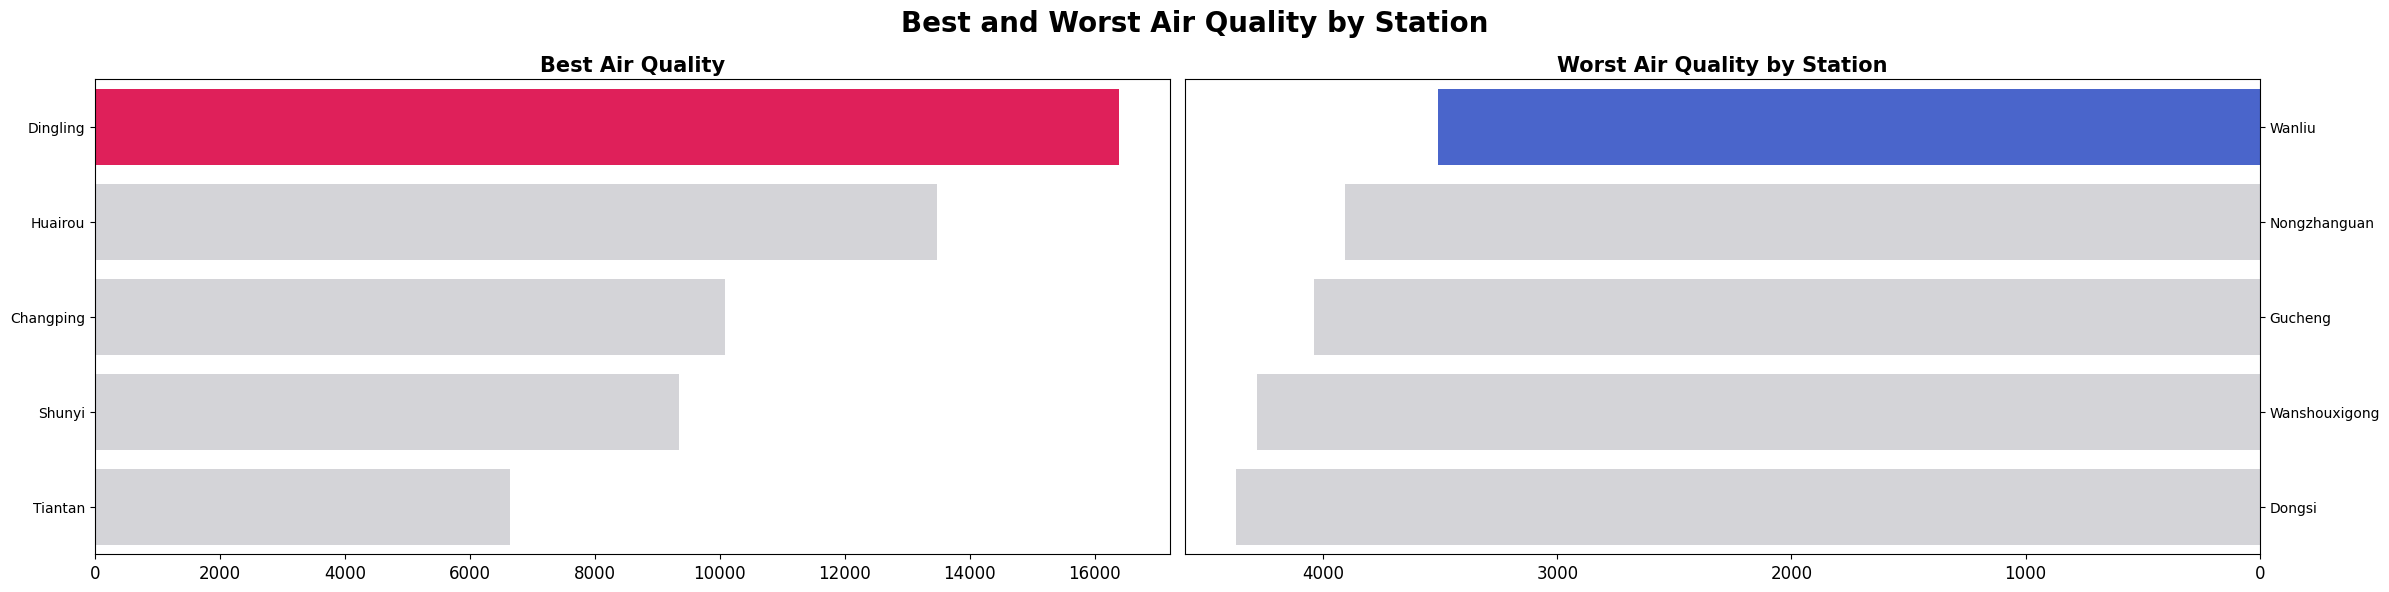

In [158]:
# Membuat subplots grid untuk menampilkan visualisasi
fig, ax = plt.subplots(figsize=(24, 6), nrows=1, ncols=2)

# Membuat warna untuk visualisasi
colors1 = ["#FF004D" , "#D3D3D9", "#D3D3D9", "#D3D3D9", "#D3D3D9"]
colors2 = ["#3559E0" , "#D3D3D9", "#D3D3D9", "#D3D3D9", "#D3D3D9"]

# Membuat barplot ax[0]
sns.barplot(x='index_aqi', y='column_station', data=area_df.head(5), palette=colors1, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Best Air Quality', loc='center', fontsize=15, fontweight='bold')
ax[0].tick_params(axis='x', labelsize=12)

# Membuat barplot ax[1]
sns.barplot(x='index_aqi', y='column_station', data=area_df.sort_values(by='index_aqi', ascending=True).head(5), palette=colors2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Air Quality by Station', loc='center', fontsize=15, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=12)

plt.suptitle('Best and Worst Air Quality by Station', fontsize=20, fontweight='bold')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### 2. Bagaimana Pengaruh SO2, NO2, CO dan O3 terhadap kualitas udara?

In [159]:
# pengaruh pm2.5 pm10 so2 no2 co o3 terhadap kualitas udara
df_aqi['column_SO2'] = df_aqi['column_SO2'].astype('float')
df_aqi['column_NO2'] = df_aqi['column_NO2'].astype('float')
df_aqi['column_CO'] = df_aqi['column_CO'].astype('float')
df_aqi['column_O3'] = df_aqi['column_O3'].astype('float')

In [160]:
# membuat dataframe baru berisi nilai mean berdasarkan kualitas udara
df_mean_quality = df_aqi.groupby(by='quality_air').agg({
    'column_SO2': 'mean',
    'column_NO2': 'mean',
    'column_CO': 'mean',
    'column_O3': 'mean',
})
df_mean_quality

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\2287340627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean_quality = df_aqi.groupby(by='quality_air').agg({


,column_SO2,column_NO2,column_CO,column_O3
quality_air,,,,
Bersih,5.674283,25.367375,515.465883,60.477098
Buruk,47.079046,85.509142,2461.735609,44.132865
Sedang,11.325742,58.519686,1303.979756,60.738608


In [161]:
df_mean_quality = df_mean_quality.T
df_mean_quality

quality_air,Bersih,Buruk,Sedang
column_SO2,5.674283,47.079046,11.325742
column_NO2,25.367375,85.509142,58.519686
column_CO,515.465883,2461.735609,1303.979756
column_O3,60.477098,44.132865,60.738608


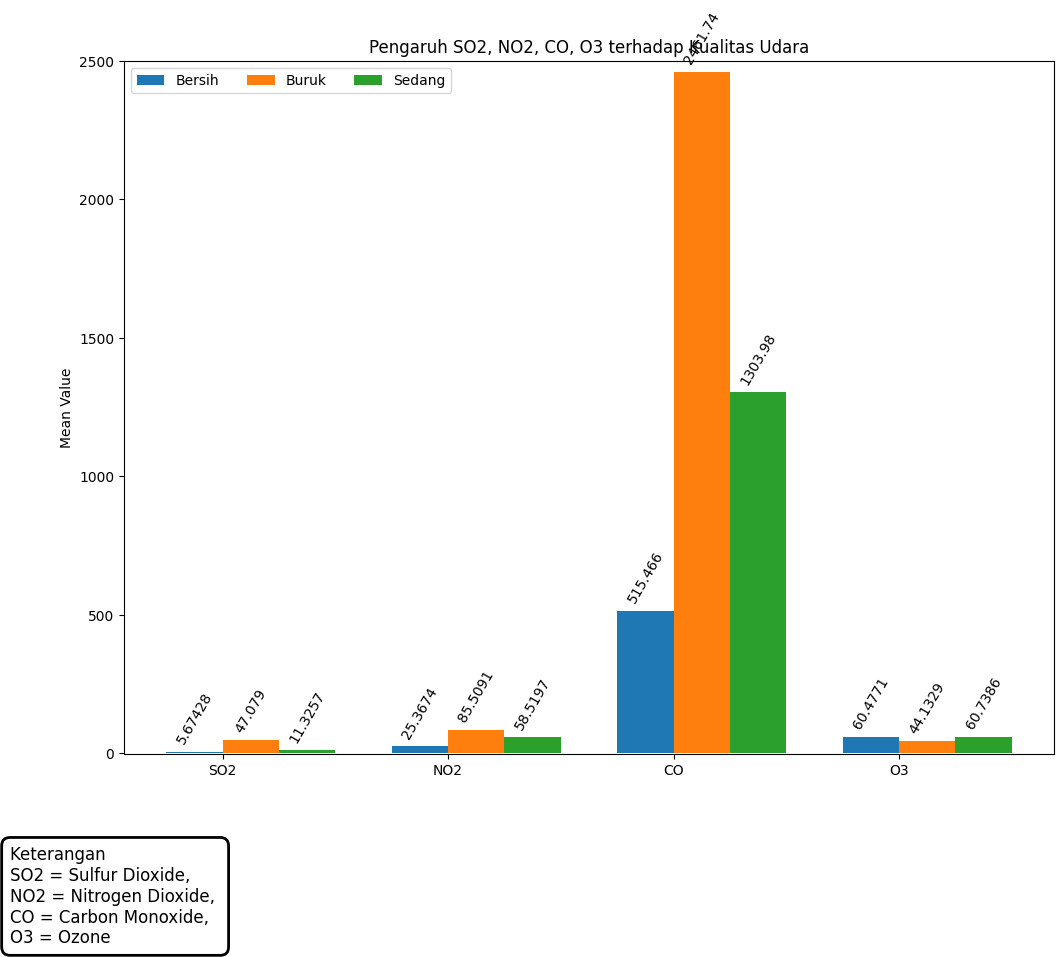

In [162]:
species = ("SO2", "NO2", "CO", "O3")

# mengatur posisi lebar dan jarak
x = np.arange(len(species))
width = 0.25
multiplier = 1

fig, ax = plt.subplots(figsize=(12, 9))  # Membuat subplot grid dengan ukuran plot yang disesuaikan

# looping untuk mengisi subplot grid dengan plots
for attribute, measurement in df_mean_quality.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4, rotation=60)
    multiplier += 1

# Menambah text, title,& label
ax.set_ylabel('Mean Value')
ax.set_title('Pengaruh SO2, NO2, CO, O3 terhadap Kualitas Udara')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(species)  # Corrected the method name for setting xticks labels
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(-2, 2500)
bbox_props = dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white', lw=2)
plt.text(0.03, -0.1, 'Keterangan \nSO2 = Sulfur Dioxide, \nNO2 = Nitrogen Dioxide, \nCO = Carbon Monoxide, \nO3 = Ozone',
         fontsize=12, color='black', bbox=bbox_props, transform=plt.gcf().transFigure)


plt.show()

#### 3. Bagaimana pengaruh "TEMP","PRES","DEWP", dan "WSPM" terhadap kualitas udara?

In [163]:
df_aqi['column_TEMP'] = df_aqi['column_TEMP'].apply(lambda x: round(x, 2)) # membulatkan nilai suhu

In [164]:
# membuat dataframe baru berisi nilai mean berdasarkan kualitas udara
df_mean_quality = df_aqi.groupby(by='quality_air').agg({
    'column_TEMP': 'mean',
    'column_PRES': 'mean',
    'column_DEWP': 'mean',
    'column_WSPM': 'mean',
})
df_mean_quality

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\246353642.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean_quality = df_aqi.groupby(by='quality_air').agg({


,column_TEMP,column_PRES,column_DEWP,column_WSPM
quality_air,,,,
Bersih,13.467696,1011.477361,-0.672397,2.187422
Buruk,7.634481,1014.242206,-2.409981,1.385051
Sedang,16.316829,1008.456395,7.660989,1.468700


In [165]:
# transpose dataframe
df_mean_quality = df_mean_quality.T
df_mean_quality

quality_air,Bersih,Buruk,Sedang
column_TEMP,13.467696,7.634481,16.316829
column_PRES,1011.477361,1014.242206,1008.456395
column_DEWP,-0.672397,-2.409981,7.660989
column_WSPM,2.187422,1.385051,1.468700


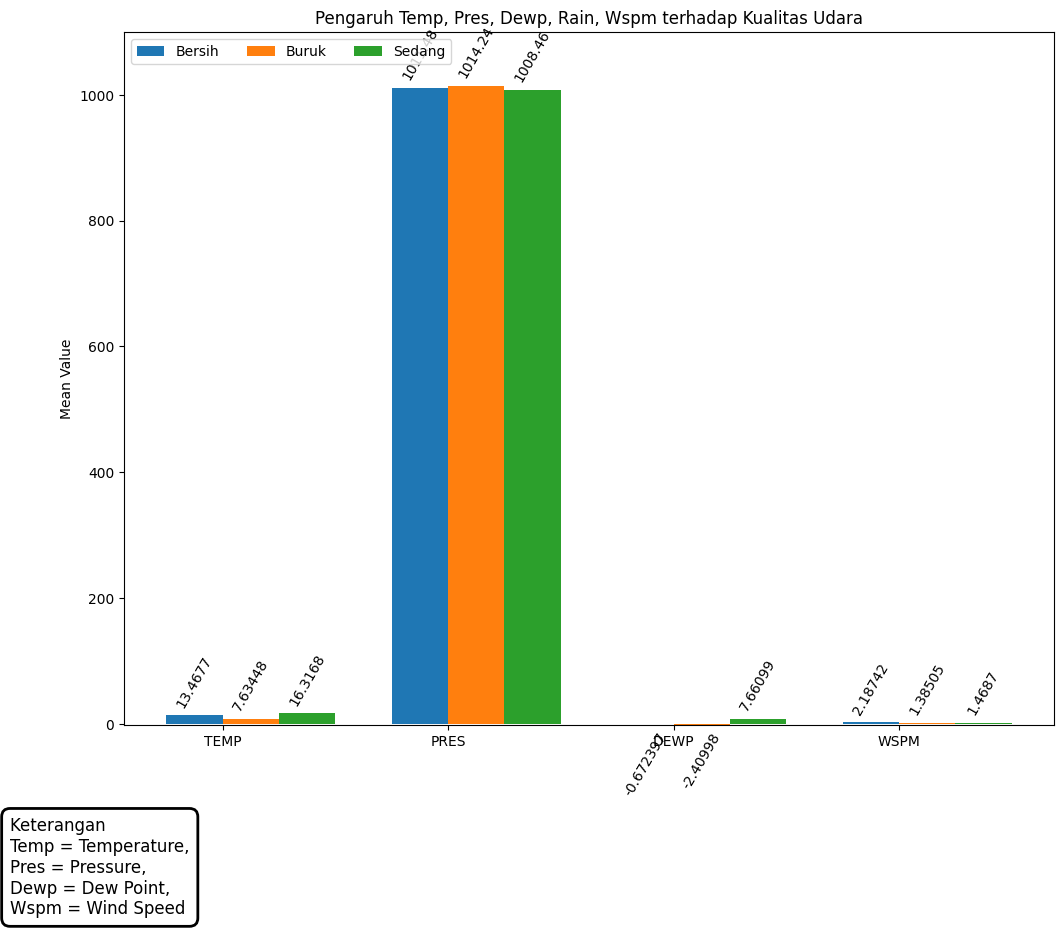

In [166]:
species = ("TEMP", "PRES", "DEWP", "WSPM")

# mengatur posisi lebar dan jarak
x = np.arange(len(species))
width = 0.25
multiplier = 1

fig, ax = plt.subplots(figsize=(12, 9))  # Membuat subplot grid dengan ukuran plot yang disesuaikan

# looping untuk mengisi subplot grid dengan plots
for attribute, measurement in df_mean_quality.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4, rotation=60)
    multiplier += 1

# Menambah text, title,& label
ax.set_ylabel('Mean Value')
ax.set_title('Pengaruh Temp, Pres, Dewp, Rain, Wspm terhadap Kualitas Udara')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(species)  # Corrected the method name for setting xticks labels
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(-2, 1100)
bbox_props = dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white', lw=2)
plt.text(0.03, -0.1, 'Keterangan \nTemp = Temperature,\nPres = Pressure, \nDewp = Dew Point, \nWspm = Wind Speed',
         fontsize=12, color='black', bbox=bbox_props, transform=plt.gcf().transFigure)


plt.show()


#### 4. Bagaimana kualitas udara berdasarkan tahun, bulan, hari, & jam?

In [167]:
cat_var = ['column_year', 'column_month', 'column_day', 'column_hour']

C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\3701406397.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(y= df_aqi.groupby(by= cat_var[k]).index_aqi.sum(),
C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\3701406397.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x= df_aqi.groupby(by= cat_var[k]).mean(numeric_only=True).index, ax= ax[i,j], palette= 'winter')
C:\Users\pozak\AppData\Local\Temp\ipykernel_11216\3701406397.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

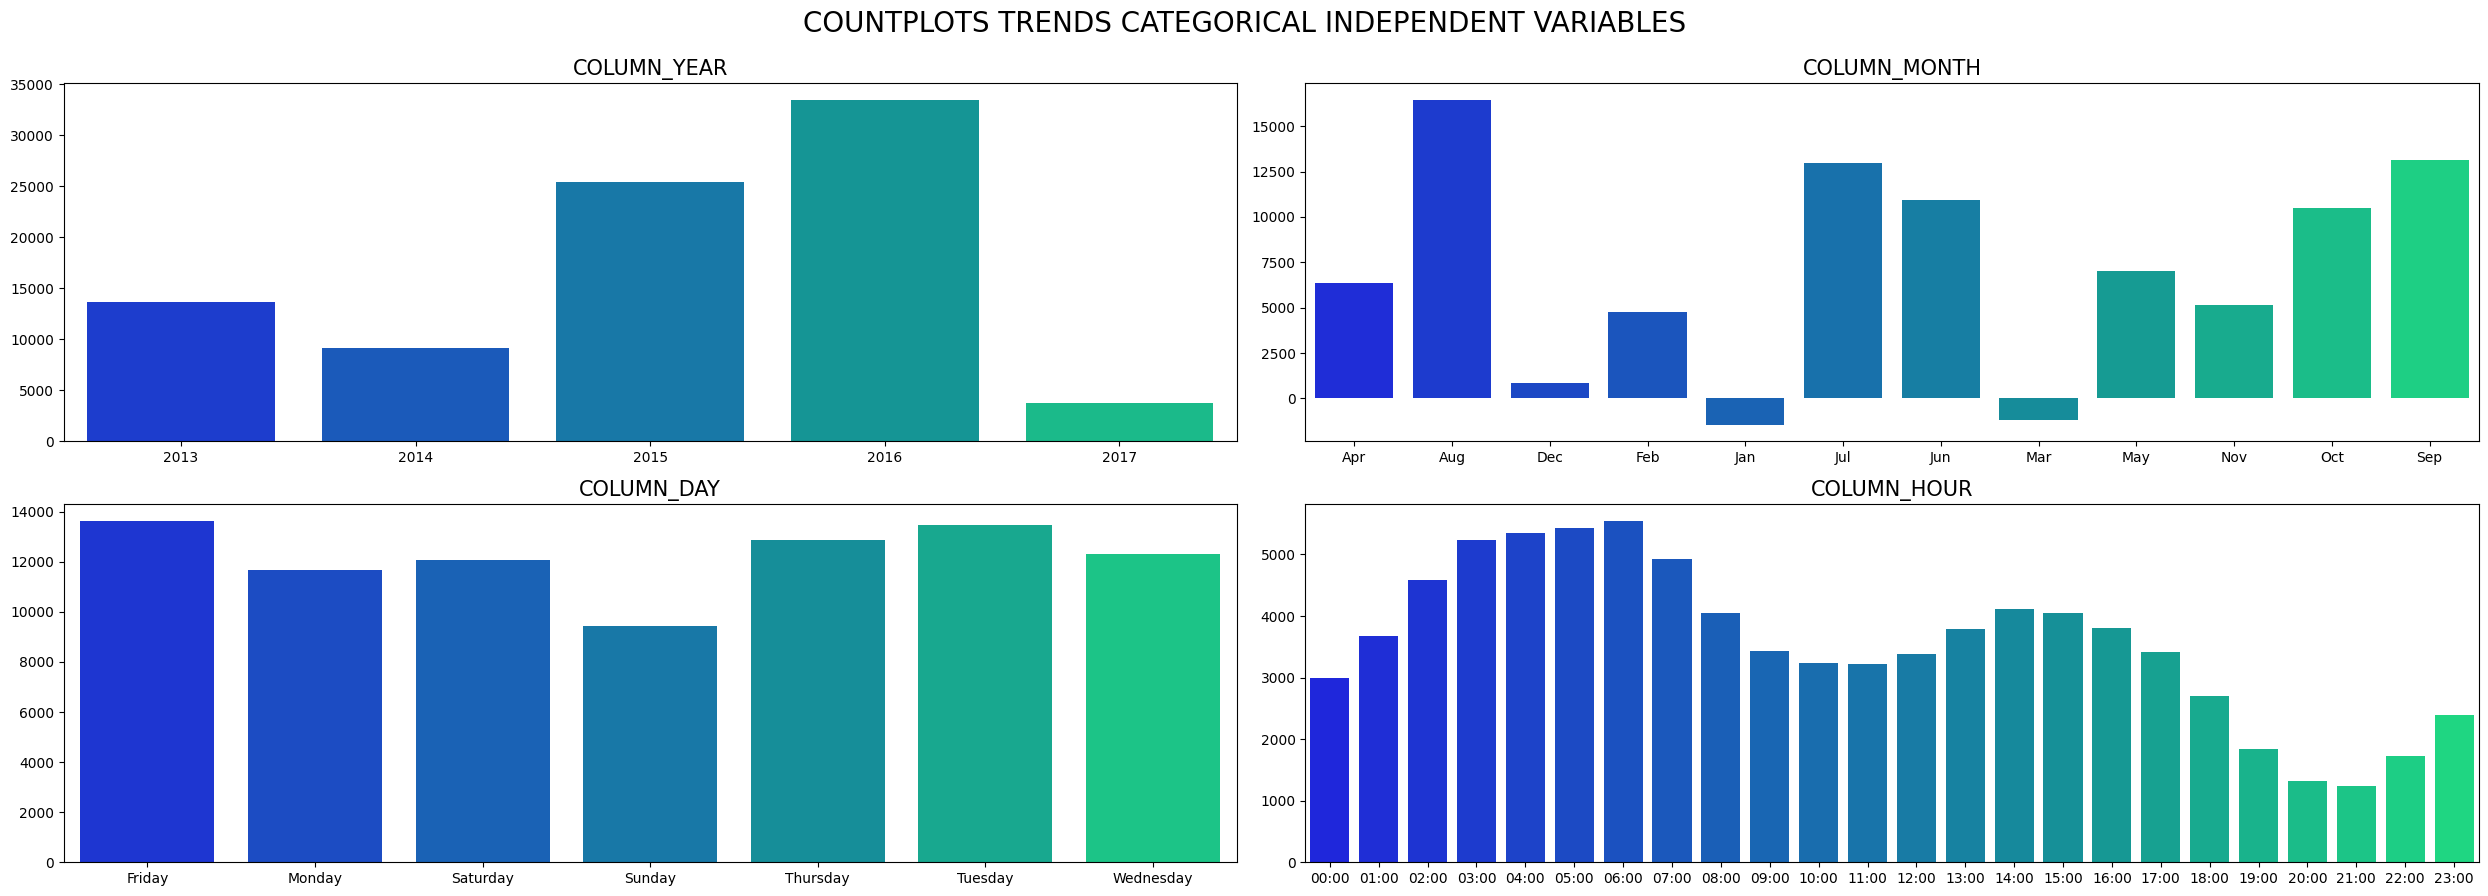

In [168]:
# Membuat subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cat_var)/2), figsize= (25,9))

# Membuat main title
plt.suptitle('Countplots trends categorical independent variables'.upper(), fontsize= 20, fontweight= 20, y= 0.99)

# Looping untuk mengisi subplot grid dengan plots
k= 0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.barplot(y= df_aqi.groupby(by= cat_var[k]).index_aqi.sum(),
                    x= df_aqi.groupby(by= cat_var[k]).mean(numeric_only=True).index, ax= ax[i,j], palette= 'winter')


        ax[i,j].set_title(f'{cat_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')
        k+=1

plt.tight_layout()
plt.show()

#### 5. Heatmap Correlation

In [169]:
df_heatmap = df_aqi.drop(columns=['column_year', 'column_index']) 

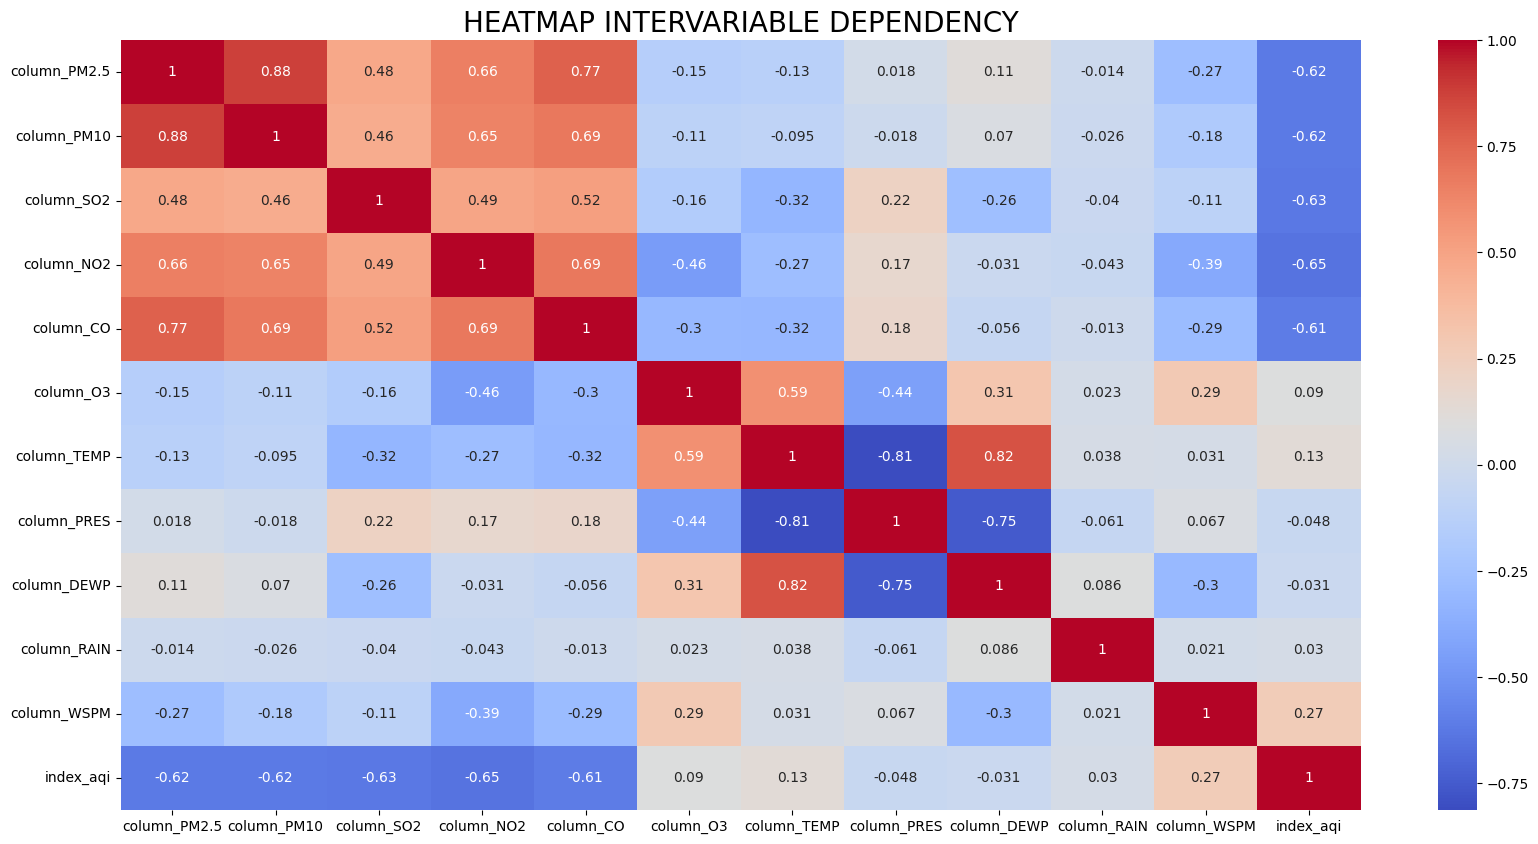

In [170]:
#menyiapkan plot size
plt.figure(figsize=(20,10))

#plotting heatmap
sns.heatmap(df_heatmap.corr(numeric_only=True), annot= True, cmap='coolwarm')

#membuat title
plt.title('Heatmap intervariable dependency'.upper(), fontsize= 20, y=1)

plt.show()

#### **Conclusion**

* Conclusion Pertanyaan 1 : Daerah yang memiliki kualitas udara terendah adalah wanliu, nozhuang, dan diikuti gucheng, dan yang memiliki kualitas udara terbaik adalah dingling, huairou, dan changping
* Conclusion Pertanyaan 2 : Pengaruh SO2, NO2, CO dan O3 terhadap kualitas udara sangat berpengaruh terhadap kualitas udara disini menandakan bahwa semakin tinggi carbon monoxide (CO) maka kualitas udara akan semakin buruk
* Conclusion Pertanyaan 3 : Pengaruh TEMP,PRES,DEWP,RAIN, dan WSPM semakin tinggi maka semakin bagus dan kualitas udara sangat berpengaruh terhadap kualitas udara disini maka menandakan bahwa semakin tinggi temperatur (TEMP) maka kualitas udara akan semakin buruk
* Conclution pertanyaa 4: Kualitas udara terbaik di tahun 2016, dan terendah di tahun 2017. Berdasarkan bulan kualitas udara terbaik di bulan Agustus, dan terendah Januari. Berdasarkan hari kualitas udara terbaik di hari selasa dan jumat, dan terendah di hari Minggu. Berdasarkan waktu jam kualitas udara terbaik di jam 06:00, dan terendah di jam 21:00


In [171]:
#mengekspor dataset yang sudah di berishkan
df_aqi.to_csv("df_aqi.csv", index=False )